In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/Corndog.csv'
data = pd.read_csv(file_path)

data.head()

,Date,Country,ArticlesWithMatchedTerms,TotalArticles
0,2015-02-17,Australia,0,3
1,2015-02-17,France,1,3
2,2015-02-18,Australia,162,2159
3,2015-02-18,France,172,1551
4,2015-02-18,Germany,239,2089


In [2]:
data['Corndog'] = data['ArticlesWithMatchedTerms'] / data['TotalArticles']
data.head()

,Date,Country,ArticlesWithMatchedTerms,TotalArticles,Corndog
0,2015-02-17,Australia,0,3,0.000000
1,2015-02-17,France,1,3,0.333333
2,2015-02-18,Australia,162,2159,0.075035
3,2015-02-18,France,172,1551,0.110896
4,2015-02-18,Germany,239,2089,0.114409


In [3]:
reformatted_data = data.pivot(index='Date', columns='Country', values='Corndog')[['Australia', 'France', 'Germany', 'UK', 'Japan', 'Mexico']]
reformatted_data.head()

Country,Australia,France,Germany,UK,Japan,Mexico
Date,,,,,,
2015-02-17,0.000000,0.333333,NaN,NaN,NaN,NaN
2015-02-18,0.075035,0.110896,0.114409,0.146288,0.294728,0.126402
2015-02-19,0.056819,0.131579,0.075656,0.117765,0.204817,0.131616
2015-02-20,0.071007,0.100466,0.090366,0.127609,0.214841,0.128356
2015-02-21,0.073762,0.123499,0.093801,0.135250,0.212902,0.124183


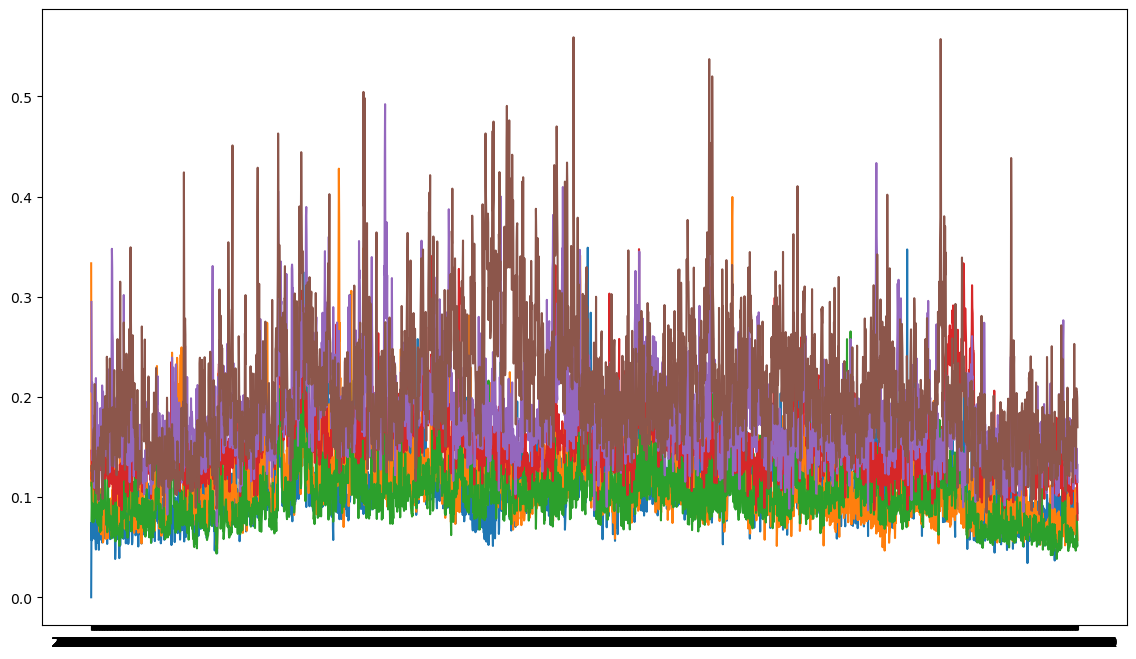

In [4]:
fig, ax = plt.subplots(figsize=(14, 8))
for country in ['Australia', 'France', 'Germany', 'UK', 'Japan', 'Mexico']:
    ax.plot(reformatted_data.index, reformatted_data[country], label=country)

plt.show()

In [5]:
reformatted_data.index = pd.to_datetime(reformatted_data.index)
monthly_averages = reformatted_data.resample('M').mean()
monthly_averages.index = monthly_averages.index.strftime('%Y-%m-01')
monthly_averages.head()

Country,Australia,France,Germany,UK,Japan,Mexico
Date,,,,,,
2015-02-01,0.065572,0.121643,0.086192,0.137183,0.182409,0.139152
2015-03-01,0.069384,0.087307,0.088595,0.127072,0.160209,0.134990
2015-04-01,0.075166,0.082989,0.087169,0.132307,0.184492,0.170552
2015-05-01,0.072621,0.104668,0.075327,0.118517,0.175538,0.187185
2015-06-01,0.075132,0.102813,0.090858,0.129714,0.177312,0.210828


In [6]:
monthly_averages.to_excel('/Users/joelthomas/Library/CloudStorage/OneDrive-Personal/Documents/My Documents/UNIVERSITY/Masters/M2 Finance/Master Thesis/Data/EME/corndogexcel.xlsx')